# INTRODUCTION


data diambil dari link berikut: [Supermarket Costumers](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)



# Libraries

In [ ]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For more interesting data visualization
import missingno as msno # For identifying and visualizing missing data
from datetime import datetime # For date manipulation
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
from google.colab import files


Penjelasan Library yang digunakan

1. pandas
2. numpy
3. matplotlib
4. seaborn
5. missingno
6. datetime
7. stats
8. lilliefors

# Preliminary Preparation

In [ ]:
initialdata = pd.read_csv('Supermarket Customers.csv')
initialdata

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...


Dari penghitungan jumlah data menggunakan command initial data, ditemukan terdapat 2240 data. Namun, ditemukan bahwa seluruh data digabung dalam satu baris yang sama. Oleh sebab itu pemisahan data perlu dilakukan.

In [ ]:
# Read data into DataFrame
pisah_data = pd.read_csv('Supermarket Customers.csv', sep="\t")
pisah_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


terdapat 29 kolom sebagai data yang dapat diolah dalam proyek ini.

In [ ]:
# Save DataFrame to new CSV file
pisah_data.to_csv('Supermarket_Customers_Separator.csv', index=False) # index=False to not save index

bagian ini dilakukan untuk menyimpan data yang sudah dipisah. Index = false digunakan agar data tidak tersimpan sebagai kolom baru.

In [ ]:
# Call back data yang sudah dipisah

data = pd.read_csv('Supermarket_Customers_Separator.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


**Explanation For Columns Data Supermarket Customers**

| Group          | Field               | Description                                                             |
|-------------------|---------------------|----------------------------------------------------------               |
| **People**        | ID                  | Customer's unique identifier                                            |
|                   | Year_Birth          | Customer's birth year                                                   |
|                   | Education           | Customer's education level                                              |
|                   | Marital_Status      | Customer's marital status                                               |
|                   | Income              | Customer's yearly household income (Dollar)                             |
|                   | Kidhome             | Number of children in customer's household                              |
|                   | Teenhome            | Number of teenagers in customer's household                             |
|                   | Dt_Customer         | Date of customer's enrollment with the company                          |
|                   | Recency             | Number of days since customer's last purchase (Days)                    |
|                   | Complain            | 1 if the customer complained in the last 2 years, 0 otherwise           |
|-------------------|---------------------|----------------------------------------------------------               |
| **Products**      | MntWines            | Amount spent on wine in the last 2 years (Dollar)                       |
|                   | MntFruits           | Amount spent on fruits in the last 2 years (Dollar)                     |
|                   | MntMeatProducts     | Amount spent on meat in the last 2 years (Dollar)                       |
|                   | MntFishProducts     | Amount spent on fish in the last 2 years (Dollar)                       |
|                   | MntSweetProducts    | Amount spent on sweets in the last 2 years (Dollar)                     |
|                   | MntGoldProds        | Amount spent on gold in the last 2 years (Dollar)                       |
|-------------------|---------------------|----------------------------------------------------------               |
| **Promotion**     | NumDealsPurchases   | Number of purchases made with a discount                                |
|                   | AcceptedCmp1        | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise   |
|                   | AcceptedCmp2        | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise   |
|                   | AcceptedCmp3        | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise   |
|                   | AcceptedCmp4        | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise   |
|                   | AcceptedCmp5        | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise   |
|                   | Response            | 1 if the customer accepted the offer in the last campaign, 0 otherwise  |
|-------------------|---------------------|----------------------------------------------------------               |
| **Place**         | NumWebPurchases     | Number of purchases made through the company’s website                  |
|                   | NumCatalogPurchases | Number of purchases made using a catalog                                |
|                   | NumStorePurchases   | Number of purchases made directly in stores                             |
|                   | NumWebVisitsMonth    | Number of visits to the company’s website in the last month            |

informasi ini didapatkan dari brief tugas capstone 2 yang disediakan oleh Purwadhika.

# Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

berdasarkan brief yang disediakan, terdapat 29 data yang dapat diolah dan dianalisis. Sebagian besar data (25 data) berupa integer. satu kumpulan data dalam bentuk float yakni di bagian pendapatan (income), dan tiga data dalam bentuk strings (education, status pernikahan, dan tanggal konsumer).

In [ ]:
data.isna().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


mencari data yang kosong menggunakan command isna. ditemukan 24 data yang kosong, terdapat di kolom income.

In [ ]:
data.duplicated().sum()

np.int64(0)

<Axes: >

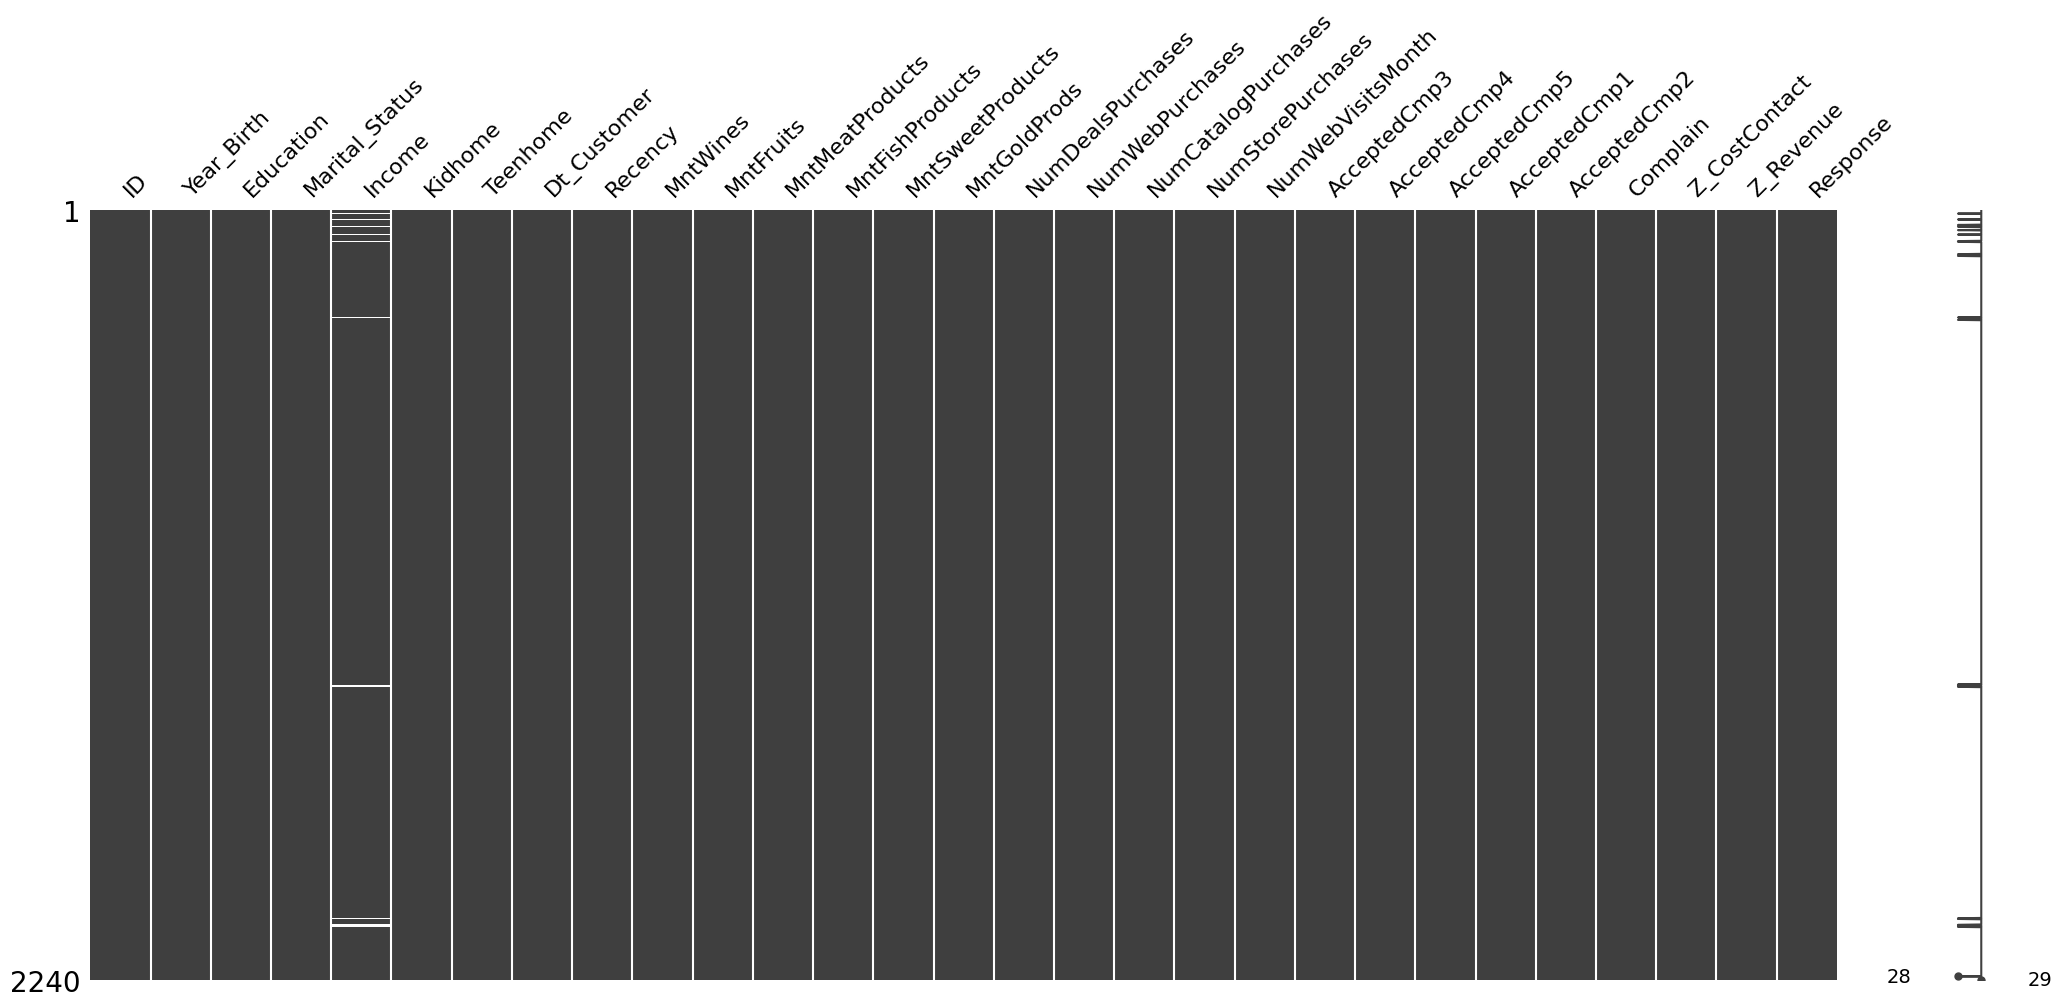

In [ ]:
msno.matrix(data)

mencari persebaran letak kode menggunakan matrix.

current summary: untuk lanjut ke proses analisis. 24 data kosong dari total 2240 harus ditangani lebih dahulu. Untuk selanjutnya, ke duapuluhempat data kosong ini akan dilakukan imputasi. Untuk menentukan metode imputasi yang sesuai, harus dilakukan analisis lebih lanjut. Analisis yang dilakukan akan terfokus dalam mencari data outlier yang tersebar di kumpulan data

data tidak ada duplikat

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# ==========================
# DATA CLEANING
# ==========================
# Hapus customer dengan ID tertentu (tidak konsisten pembelian)
data.drop([655, 981, 1524, 2132], axis=0, inplace=True)

In [ ]:
# Hapus kolom yang tidak relevan
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [ ]:
# Konversi kolom tanggal
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')


- Menghapus customer dengan ID tertentu (655, 981, 1524, 2132) karena pola pembelian mereka tidak konsisten dan dapat menjadi outlier yang mengganggu analisis.
- Menghapus kolom tidak relevan seperti Z_CostContact dan Z_Revenue agar analisis lebih fokus dan tidak terganggu oleh informasi yang tidak berguna.
- Mengonversi kolom Dt_Customer menjadi format datetime agar bisa digunakan untuk menghitung durasi dan analisis waktu.

In [ ]:
# ==========================
# FEATURE ENGINEERING
# ==========================
# Hitung lama bergabung (JoinedTime)
current_date = data['Dt_Customer'].max()
last_join = data.groupby('ID')['Dt_Customer'].max()
joined_days = (current_date - last_join).dt.days.rename('JoinedTime(days)')


In [ ]:
# Merge ke data utama
data_merge = pd.merge(data, joined_days, on='ID')

# Pastikan Recency tidak lebih besar dari JoinedTime
data_merge['Recency'] = data_merge.apply(
    lambda row: row['JoinedTime(days)'] if row['Recency'] > row['JoinedTime(days)'] else row['Recency'],
    axis=1
)

- Menghitung lama bergabung (JoinedTime) sebagai selisih antara tanggal maksimum dan tanggal bergabung terakhir.
- Menyesuaikan nilai Recency agar tidak lebih besar dari JoinedTime, menjaga konsistensi logika waktu.


In [ ]:
# ==========================
# TRANSFORMASI KATEGORI
# ==========================
# Marital Status
def maritalstatus(marital):
    mapping = {
        'Together': 'Cohabitation',
        'Absurd': 'Single',
        'YOLO': 'Single',
        'Widow': 'Divorced',
        'Alone': 'Single'
    }
    return mapping.get(marital, marital)

data_merge['Marital_Status'] = data_merge['Marital_Status'].apply(maritalstatus)

# Education
def edulevel(edu):
    mapping = {
        '2n Cycle': 'Master',
        'Basic': 'Non-degree',
        'Graduation': 'Bachelor',
        'PhD': 'Doctoral'
    }
    return mapping.get(edu, edu)

data_merge['Education'] = data_merge['Education'].apply(edulevel)


- Normalisasi status pernikahan: menggabungkan kategori tidak umum seperti 'YOLO', 'Absurd', 'Alone' menjadi kategori yang lebih umum seperti 'Single'.
- Normalisasi tingkat pendidikan: menyederhanakan kategori seperti '2n Cycle' menjadi 'Master', 'Basic' menjadi 'Non-degree', dll.

In [ ]:
# ==========================
# AGE & GENERATION
# ==========================
data_merge.insert(2, 'Age', data_merge['Year_Birth'].apply(lambda x: 2014 - x))

def rangeumur(age):
    if age < 11:
        return 'Gen Alpha'
    elif 12 <= age <= 27:
        return 'Gen Z'
    elif 28 <= age <= 43:
        return 'Millennials'
    elif 44 <= age <= 59:
        return 'Gen X'
    elif 60 <= age <= 78:
        return 'Baby Boomers'
    else:
        return 'Silent Generation-Elder'

data_merge.insert(3, 'Age_Range', data_merge['Age'].apply(rangeumur))


- Normalisasi status pernikahan: menggabungkan kategori tidak umum seperti 'YOLO', 'Absurd', 'Alone' menjadi kategori yang lebih umum seperti 'Single'.
- Normalisasi tingkat pendidikan: menyederhanakan kategori seperti '2n Cycle' menjadi 'Master', 'Basic' menjadi 'Non-degree', dll.

In [ ]:
# ==========================
# INCOME CATEGORY
# ==========================
def labelincome(x):
    if x <= 35303:
        return 'Lower'
    elif x <= 51371:
        return 'Lower-Middle'
    elif x <= 68468:
        return 'Upper-Middle'
    else:
        return 'Upper'

data_merge.insert(7, 'IncomeCategory', data_merge['Income'].apply(labelincome))


- Mengklasifikasikan pendapatan ke dalam kategori Lower, Lower-Middle, Upper-Middle, dan Upper agar lebih mudah dianalisis dan dibandingkan antar kelompok.


In [ ]:
# ==========================
# PROMO CAMPAIGN
# ==========================
def campaign(campaignacc):
    return 'Never accepted promos' if campaignacc == 0 else 'Accepted promos'

data_merge['PromoReceived'] = data_merge[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)
data_merge['PromoAcceptedCat'] = data_merge['PromoReceived'].apply(campaign)


- Menghitung jumlah promo yang diterima oleh pelanggan dari berbagai promosi.
- Membuat kategori apakah pelanggan pernah menerima promo atau tidak, untuk analisis efektivitas promosi.


In [ ]:
# ==========================
# FAMILY MEMBERS
# ==========================
def totfam_member(status):
    return 2 if status in ['Married', 'Cohabitation'] else 1

data_merge['FamilyHomeMember'] = data_merge['Marital_Status'].apply(totfam_member) + data_merge['Kidhome'] + data_merge['Teenhome']


- Menghitung jumlah anggota keluarga di rumah berdasarkan status pernikahan dan jumlah anak (Kidhome + Teenhome).
- Memberikan gambaran beban rumah tangga yang bisa memengaruhi perilaku konsumsi.

In [ ]:
# ==========================
# PRODUCT EXPENSES
# ==========================
data_merge['WinesExpense']  = data['MntWines'] * 32
data_merge['FruitsExpense'] = data['MntFruits'] * 4
data_merge['MeatExpense']   = data['MntMeatProducts'] * 5
data_merge['FishExpense']   = data['MntFishProducts'] * 8.5
data_merge['SweetExpense']  = data['MntSweetProducts'] * 2.27
data_merge['GoldExpense']   = data['MntGoldProds'] * 10

# Total Monetary
data_merge['Monetary'] = data_merge[['WinesExpense','FruitsExpense','MeatExpense','FishExpense','SweetExpense','GoldExpense']].sum(axis=1)

# Frequency
data_merge['Frequency'] = data_merge[['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases']].sum(axis=1)


- Menghitung pengeluaran untuk masing-masing kategori produk (Wines, Fruits, Meat, Fish, Sweet, Gold) dengan mengalikan jumlah pembelian dengan harga rata-rata.
- Menjumlahkan total pengeluaran (Monetary) untuk analisis nilai pelanggan.
- Menghitung frekuensi pembelian dari berbagai channel (web, store, katalog, deals).

In [ ]:
# ==========================
# HANDLING MISSING VALUES
# ==========================
medianAEMI = data_merge.groupby(['Age_Range','Education','Marital_Status'])[['Income']].median()

for i in data_merge[data_merge['Income'].isna()].index:
    group_key = (data_merge.loc[i,'Age_Range'], data_merge.loc[i,'Education'], data_merge.loc[i,'Marital_Status'])
    data_merge.loc[i,'Income'] = medianAEMI.loc[group_key,'Income']


- Mengisi nilai Income yang kosong dengan median berdasarkan kelompok kombinasi Age_Range, Education, dan Marital_Status.
- Tujuannya agar nilai pengganti tetap konsisten dengan karakteristik demografi pelanggan.

In [ ]:
# ==========================
# OUTLIER HANDLING
# ==========================
# Replace income for ID 9432 with median of its group
id_target = 9432
group_key = (
    data_merge.loc[data_merge['ID'] == id_target, 'Age_Range'].values[0],
    data_merge.loc[data_merge['ID'] == id_target, 'Education'].values[0],
    data_merge.loc[data_merge['ID'] == id_target, 'Marital_Status'].values[0]
)

try:
    median_income = medianAEMI.loc[group_key, 'Income']
    data_merge.loc[data_merge['ID'] == id_target, 'Income'] = median_income
except KeyError:
    print(f"No median value found for group {group_key}")


In [ ]:
# Hapus data dengan Year_Birth tidak valid
data_merge.drop(data_merge[data_merge['Year_Birth'] <= 1900].index, inplace=True)


- Mengganti nilai Income untuk ID tertentu (9432) dengan median kelompoknya karena nilai aslinya dianggap outlier.
- Menghapus data dengan Year_Birth tidak valid (<= 1900) karena menghasilkan umur yang tidak realistis (>114 tahun).


In [ ]:
from google.colab import files

# ==========================
# FINAL CHECK
# ==========================
print(data_merge.head())
print(data_merge.info())
# ==========================
# DOWNLOAD HASIL CLEANING
# ==========================
# Simpan hasil cleaning ke file CSV
cleaned_filename = "cleaned_data.csv"
data_merge.to_csv(cleaned_filename, index=False)

# Unduh file
files.download(cleaned_filename)

     ID  Year_Birth  Age     Age_Range Education Marital_Status   Income  \
0  5524        1957   57         Gen X  Bachelor         Single  58138.0   
1  2174        1954   60  Baby Boomers  Bachelor         Single  46344.0   
2  4141        1965   49         Gen X  Bachelor   Cohabitation  71613.0   
3  6182        1984   30   Millennials  Bachelor   Cohabitation  26646.0   
4  5324        1981   33   Millennials  Doctoral        Married  58293.0   

  IncomeCategory  Kidhome  Teenhome  ...       PromoAcceptedCat  \
0   Upper-Middle        0         0  ...        Accepted promos   
1   Lower-Middle        1         1  ...  Never accepted promos   
2          Upper        0         0  ...  Never accepted promos   
3          Lower        1         0  ...  Never accepted promos   
4   Upper-Middle        1         0  ...  Never accepted promos   

   FamilyHomeMember  WinesExpense  FruitsExpense  MeatExpense  FishExpense  \
0                 1       20320.0          352.0       2730.0 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Menampilkan 5 baris pertama dan struktur dataframe untuk memastikan hasil cleaning sudah sesuai.
- Menyimpan hasil akhir ke file CSV.
- File CSV diunduh agar bisa digunakan untuk analisis lanjutan atau modeling.